In [ ]:
import os
import zipfile
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:


# Step 1: Unzip the folder (if needed)
zip_path = 'Group_4.zip'
extract_path = '/content/extracted_dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

def get_dataset_size(folder_path):
  total_files = 0
  for root, _, files in os.walk(folder_path):
    for file in files:
      if os.path.isfile(os.path.join(root, file)):
        total_files += 1
  return total_files

folder_path = "/content/extracted_dataset/Group_4"
dataset_size = get_dataset_size(folder_path)
print(f"The size of your dataset is {dataset_size} files.")


train_path = os.path.join(extract_path, 'Group_4/train')

test_path = os.path.join(extract_path, 'Group_4/test')


if os.path.exists(train_path):
    print(f"Train batch exists at {train_path}.")
else:
    print("No separate train batch found.")

if os.path.exists(test_path):
    print(f"Test batch exists at {test_path}.")
else:
    print("No separate test batch found.")

def get_classes(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return classes

if os.path.exists(train_path):
    train_classes = get_classes(train_path)
    print(f"Classes in the train batch: {train_classes}")
if os.path.exists(test_path):
    test_classes = get_classes(test_path)
    print(f"Classes in the test batch: {test_classes}")



The size of your dataset is 2400 files.
Train batch exists at /content/extracted_dataset/Group_4/train.
Test batch exists at /content/extracted_dataset/Group_4/test.
Classes in the train batch: ['lifeboat', 'moving-van', 'pay-phone', 'compass', 'limousine']
Classes in the test batch: ['lifeboat', 'moving-van', 'pay-phone', 'compass', 'limousine']


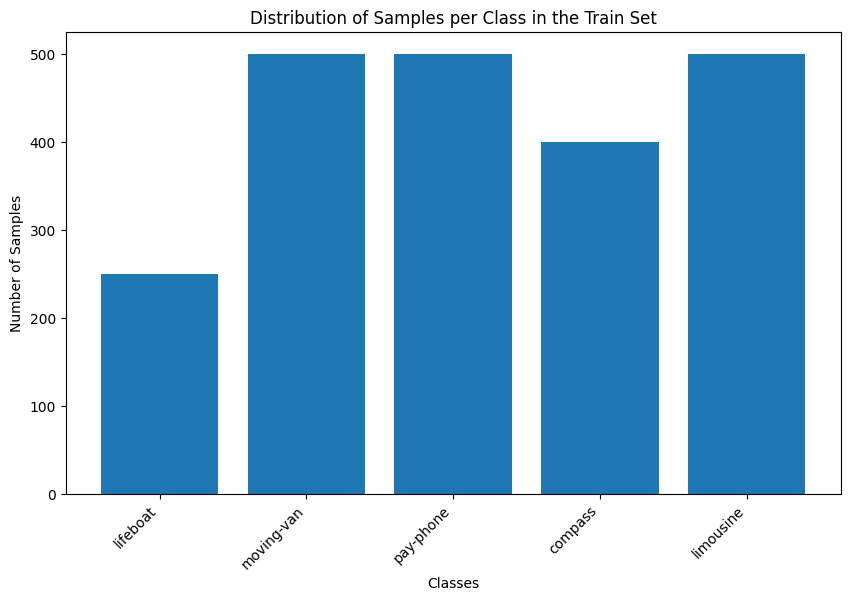

In [ ]:

def get_class_distribution(folder_path):
    class_distribution = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            num_samples = len(os.listdir(class_path))
            class_distribution[class_name] = num_samples
    return class_distribution


train_path = '/content/extracted_dataset/Group_4/train'

train_class_distribution = get_class_distribution(train_path)
plt.figure(figsize=(10, 6))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class in the Train Set')
plt.xticks(rotation=45, ha='right')
plt.show()


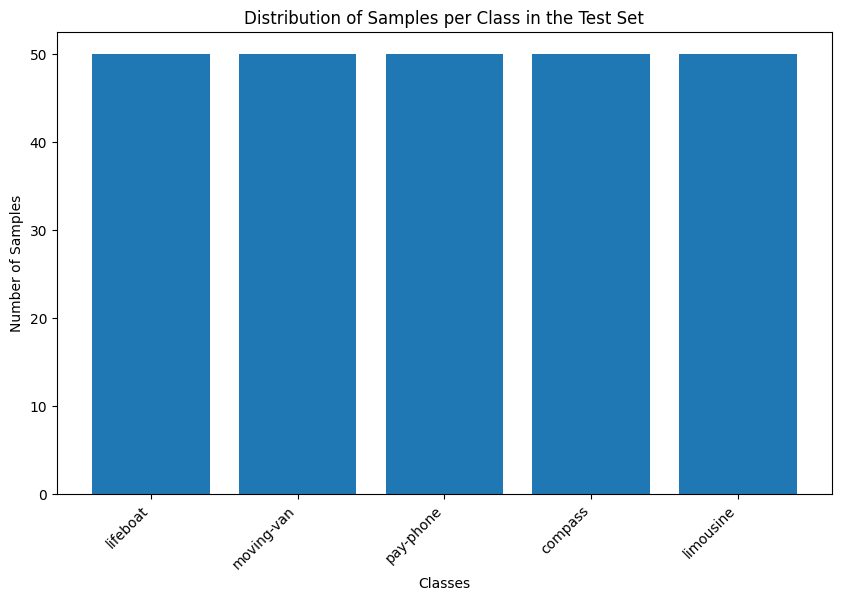

In [ ]:

test_path = '/content/extracted_dataset/Group_4/test'

test_class_distribution = get_class_distribution(test_path)

plt.figure(figsize=(10, 6))
plt.bar(test_class_distribution.keys(), test_class_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class in the Test Set')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
def get_classes(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return classes

if os.path.exists(train_path):
    train_classes = get_classes(train_path)
    print(f"Classes in the train batch: {train_classes}")
if os.path.exists(test_path):
    test_classes = get_classes(test_path)
    print(f"Classes in the test batch: {test_classes}")

def load_and_preprocess_images(folder_path, target_size=(64, 64)):
    data = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                image = image.resize(target_size)
                data.append(np.array(image).flatten())
                labels.append(class_name)
    return np.array(data), np.array(labels)


X_train, y_train = load_and_preprocess_images(train_path)


X_test, y_test = load_and_preprocess_images(test_path)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

print("Results on the training set:")
print(f"Accuracy: {train_accuracy}")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Classification Report:\n{train_classification_report}")

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("\nResults on the test set:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")


Classes in the train batch: ['lifeboat', 'moving-van', 'pay-phone', 'compass', 'limousine']
Classes in the test batch: ['lifeboat', 'moving-van', 'pay-phone', 'compass', 'limousine']
Results on the training set:
Accuracy: 1.0
Confusion Matrix:
[[400   0   0   0   0]
 [  0 250   0   0   0]
 [  0   0 500   0   0]
 [  0   0   0 500   0]
 [  0   0   0   0 500]]
Classification Report:
              precision    recall  f1-score   support

     compass       1.00      1.00      1.00       400
    lifeboat       1.00      1.00      1.00       250
   limousine       1.00      1.00      1.00       500
  moving-van       1.00      1.00      1.00       500
   pay-phone       1.00      1.00      1.00       500

    accuracy                           1.00      2150
   macro avg       1.00      1.00      1.00      2150
weighted avg       1.00      1.00      1.00      2150


Results on the test set:
Accuracy: 0.324
Confusion Matrix:
[[13  6  7  9 15]
 [12 10  4  9 15]
 [ 4  4 22 10 10]
 [ 7  7 11 17 

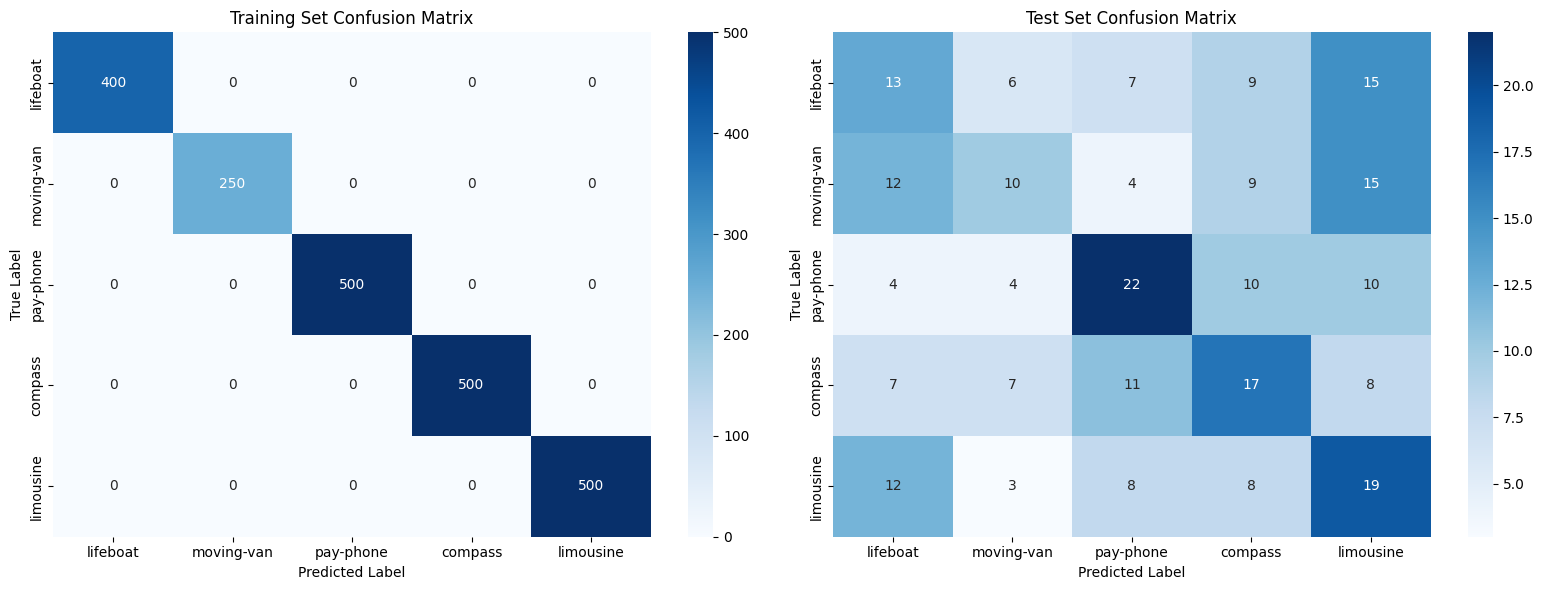

In [ ]:

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_classes, yticklabels=train_classes)
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_classes, yticklabels=test_classes)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
X_train, y_train = load_and_preprocess_images(train_path)
X_test, y_test = load_and_preprocess_images(test_path)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_to_index = {label: index for index, label in enumerate(np.unique(y_train))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])

model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(len(np.unique(y_train_numeric)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_numeric, epochs=30, batch_size=256)

train_results = model.evaluate(X_train, y_train_numeric)
print("Results on the training set:")
print(f"Accuracy: {train_results[1]}")

y_test_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_probs, axis=1)

y_test_numeric = np.array([label_to_index[label] for label in y_test])


test_accuracy = accuracy_score(y_test_numeric, y_test_pred)
test_conf_matrix = confusion_matrix(y_test_numeric, y_test_pred)
test_classification_report = classification_report(y_test_numeric, y_test_pred)

print("\nResults on the test set:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")


Epoch 1/30
9/9 [==============================] - 1s 5ms/step - loss: 1.5591 - accuracy: 0.2763
Epoch 2/30
9/9 [==============================] - 0s 5ms/step - loss: 1.4818 - accuracy: 0.4098
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 1.4492 - accuracy: 0.4265
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 1.4127 - accuracy: 0.4670
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 1.3789 - accuracy: 0.4860
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 1.3425 - accuracy: 0.5098
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 1.3017 - accuracy: 0.5312
Epoch 8/30
9/9 [==============================] - 0s 6ms/step - loss: 1.2585 - accuracy: 0.5581
Epoch 9/30
9/9 [==============================] - 0s 6ms/step - loss: 1.2138 - accuracy: 0.5749
Epoch 10/30
9/9 [==============================] - 0s 5ms/step - loss: 1.1664 - accuracy: 0.5940
Epoch 11/30
9/9 [======================

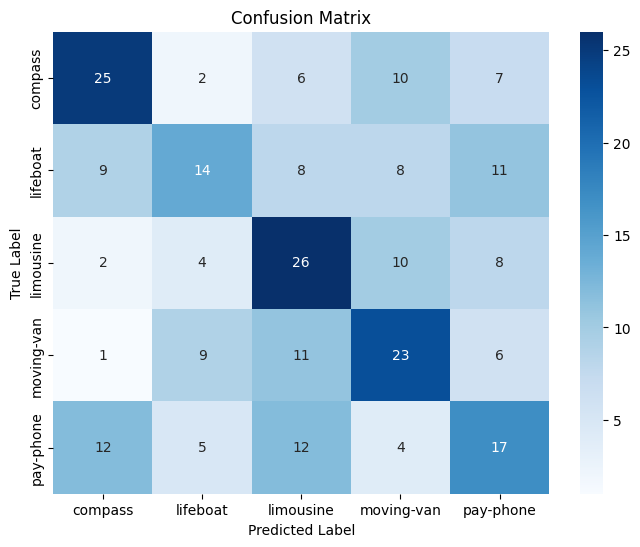

In [ ]:

conf_mat = confusion_matrix(y_test_numeric, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()